In [1]:
from modules.stats_v3 import *
from modules.helper_functions_v3 import *
from modules.plot_functions_v3 import *

import config

import __main__
from sys import argv
from os.path import join, isdir
from os import makedirs

In [2]:
plot_pretty()
saveimage = False

In [ ]:
X_type = 'R_med'
Y_type = 'D_rms'
is_surv_probs = True

In [ ]:
brightest_dir_template = Template(join('${gendata_dir}', config.gendata_brightest_name_template.safe_substitute(_300kpc='_300kpc')))
elvis_dir = join(config.raw_dir,config.elvis_isolated_raw_name)
caterpillar_dir = join(config.raw_dir,config.caterpillar_raw_name)
save_dir = join(config.result_dir,'general')
if not isdir(save_dir):
  makedirs(save_dir)

Running for iCher
Running for iKauket
Running for iSerena
Running for iRoy
Running for iOrion
Running for iVenus
Running for iRemus
Running for iRomulus
Running for iTaurus
Running for iBurr
Running for iHera
Running for iCharybdis
Running for iHall
Running for iOates
Running for iZeus
Running for iThelma
Running for iLincoln
Running for iSiegfried
Running for iKek
Running for iLouise
Running for iScylla
Running for iSonny
Running for iHamilton
Running for iDouglas
Running for caterpillar_22_LX14
Running for caterpillar_18_LX14
Running for caterpillar_8_LX14
Running for caterpillar_14_LX14
Running for caterpillar_4_LX14
Running for caterpillar_5_LX14
Running for caterpillar_15_LX14
Running for caterpillar_19_LX14
Running for caterpillar_23_LX14
Running for caterpillar_12_LX14
Running for caterpillar_53_LX14
Running for caterpillar_2_LX14
Running for caterpillar_24_LX14
Running for caterpillar_33_LX14
Running for caterpillar_25_LX14
Running for caterpillar_3_LX14
Running for caterpillar

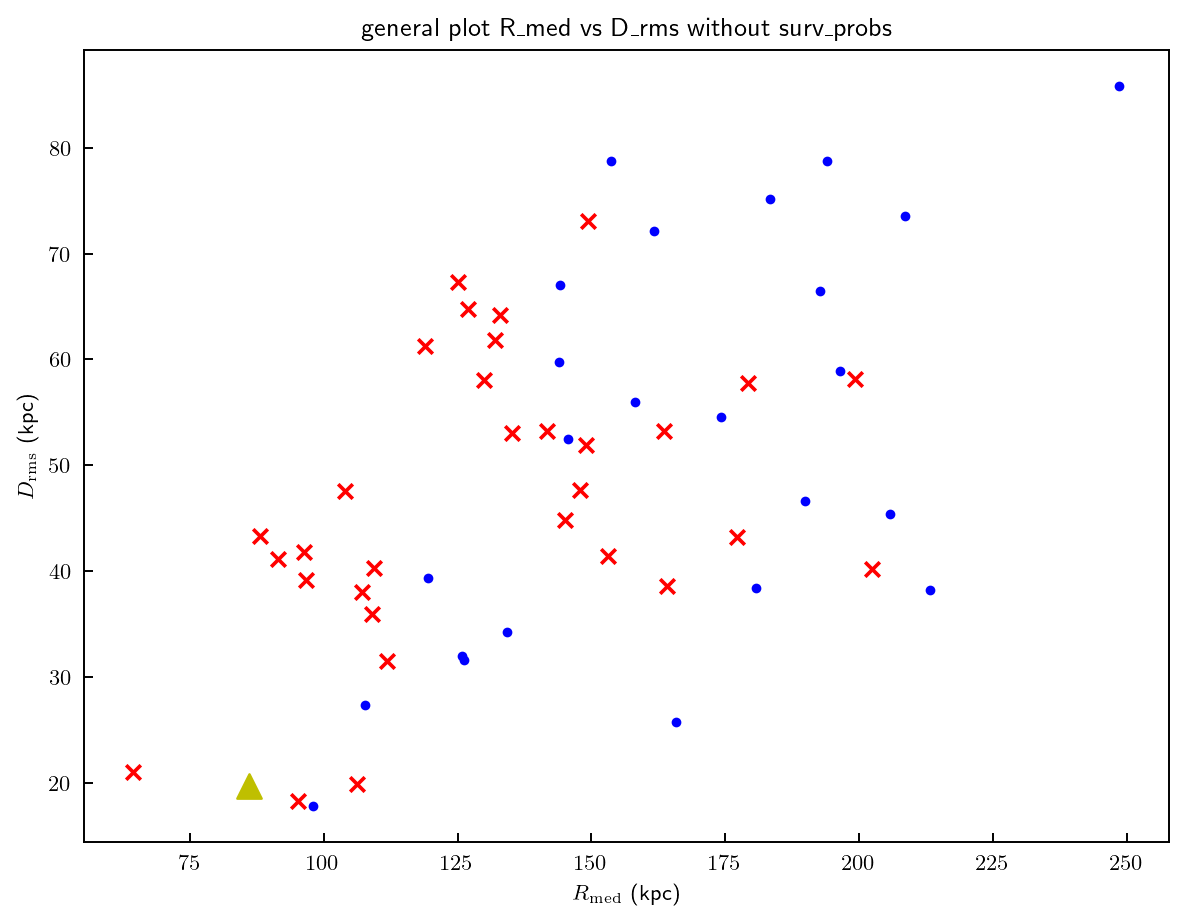

In [3]:
plot_general(elvis_dir, caterpillar_dir, brightest_dir_template, X_type=X_type, Y_type=Y_type, is_surv_probs=is_surv_probs, save_dir=save_dir, saveimage=saveimage)